### Домашнее задание

1. взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)
3. сделать feature engineering
4. обучить любой классификатор (какой вам нравится)
5. далее разделить ваш набор данных на два множества: P (positives) и U (unlabeled). Причем брать нужно не все положительные (класс 1) примеры, а только лишь часть
6. применить random negative sampling для построения классификатора в новых условиях
7. сравнить качество с решением из пункта 4 (построить отчет - таблицу метрик)
8. поэкспериментировать с долей P на шаге 5 (как будет меняться качество модели при уменьшении/увеличении размера P)

Задача look-alike, также известная как задача "похожести", относится к задачам в области машинного обучения и анализа данных. Она заключается в поиске объектов, которые по своим характеристикам (признакам) похожи на заданный объект или группу объектов.

В контексте маркетинга и рекламы, задача look-alike относится к поиску аудитории, которая похожа на целевую аудиторию или группу клиентов. Например, если у вас есть группа клиентов, которые совершили определенное действие (покупку, подписку и т.д.), вы можете использовать алгоритмы машинного обучения, чтобы найти других потенциальных клиентов, которые по своим характеристикам и поведению похожи на эту группу. Это позволяет определить новую аудиторию, которая имеет высокую вероятность быть заинтересованной в вашем продукте или услуге.

Процесс решения задачи look-alike обычно включает следующие шаги:

1.Сбор данных: Необходимо собрать данные о характеристиках и поведении объектов, которые будут использоваться для определения похожести. Это могут быть данные о клиентах, их демографические характеристики, история покупок, активности в интернете и т.д.

2.Предобработка данных: Данные обычно требуют предварительной обработки, такой как очистка от выбросов, заполнение пропущенных значений, масштабирование признаков и преобразование категориальных признаков в числовой формат.

3.Выбор модели: Необходимо выбрать модель машинного обучения, которая будет использоваться для определения похожести. Это может быть алгоритм классификации или кластеризации, такой как k-ближайших соседей, случайный лес, градиентный бустинг и т.д.

4.Обучение модели: На этом шаге модель обучается на исходных данных, чтобы определить закономерности и связи между признаками и целевыми объектами.

5.Применение модели: Обученная модель применяется к новым данным для определения похожих объектов. Может быть выдана вероятность или оценка похожести для каждого объекта.

6.Оценка результатов: После применения модели необходимо оценить ее эффективность и качество. Это может включать оценку точности модели, сравнение результатов с реальными значениями или сравнение с другими моделями.

7.Использование результатов: После успешного решения задачи look-alike можно использовать полученные результаты для различных целей. Например, это может быть использование похожей аудитории для персонализации рекламных кампаний, предложения подходящих продуктов или услуг, прогнозирования поведения клиентов и других маркетинговых стратегий.

Важно отметить, что решение задачи look-alike может быть сложным и зависит от множества факторов, таких как доступность и качество данных, выбор модели, выбор признаков и т.д. Также следует учитывать этические и юридические аспекты при использовании данных для определения похожих объектов, чтобы обеспечить конфиденциальность и соблюдение правил защиты данных.

### 1. взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)

Расмотрим пример на датасете из репозитория UCI - https://archive.ics.uci.edu/ml/datasets/Shill+Bidding+Dataset

**Цель: Поиск мошеннических действий при проведении аукционов.**

**Информация о наборе данных:**

Характеристики набора данных: Многомерный\
Количество экземпляров: 6321\
Количество атрибутов: 13\
Атрибутивные характеристики: Н/Д\
Связанные задачи: Классификация, кластеризация\
Дата создания 2020-03-10\
Количество веб-обращений: 24123

In [1]:
#!pip install pandas scikit-learn requests
import pandas as pd
import numpy as np
from io import StringIO
import requests

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00562/Shill Bidding Dataset.csv"
data_text = requests.get(url).text
data_file = StringIO(data_text)
#data = pd.read_csv(data_file, index_col='Record_ID')
data = pd.read_csv(data_file)
data.head(3)

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.4,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.2,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.2,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0


Информация об атрибутах:

**Record_ID:** уникальный идентификатор записи в наборе данных.\
**Auction_ID:** Уникальный идентификатор аукциона.\
**Bidder_ID:** Уникальный идентификатор участника торгов.\
**Bidder_Tendency:** Подставные участники торгов участвуют исключительно в аукционах нескольких продавцов, а не в диверсифицированных лотах. Это сговор между продавцом-мошенником и сообщником.\
**Bidding_Ratio:** подставной участник торгов участвует чаще, чтобы поднять цену аукциона и привлечь более высокие ставки от законных участников.\
**Successive_Outbidding:** подставной участник торгов последовательно перебивает сам себя, даже если он является текущим победителем, чтобы постепенно увеличивать цену с небольшими последовательными приращениями.\
**Last_Bidding:** Подставной участник становится неактивным на последней стадии аукциона (более 90\% продолжительности аукциона), чтобы не выиграть аукцион.\
**Auction_Bids:** Аукционы с деятельностью SB, как правило, имеют гораздо большее количество ставок, чем среднее количество ставок на параллельных аукционах.\
**Starting_Price_Average:** подставной участник обычно предлагает небольшую стартовую цену, чтобы привлечь на аукцион законных участников торгов.\
**Early_Bidding:** подставные торги обычно делают ставки довольно рано на аукционе (менее 25% от продолжительности аукциона), чтобы привлечь внимание пользователей аукциона.\
**Winning_Ratio:** подставной участник торгов участвует во многих аукционах, но почти не выигрывает ни одного аукциона.\
**Auction_Duration:** как долго длился аукцион.\
**Class:** 0 для нормального поведения торгов; 1 в противном случае.

In [3]:
df = data.copy()

In [4]:
print(df.shape)

(6321, 13)


In [5]:
df.iloc[:, -1].value_counts()
# данные не сбалансированы !!!

0    5646
1     675
Name: Class, dtype: int64

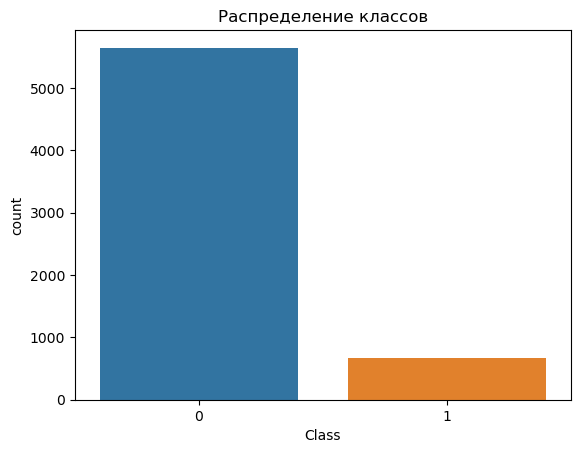

In [6]:
# Визуализация распределения классов
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df, x='Class')
plt.title("Распределение классов")
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


In [8]:
df.describe()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,7535.829457,1241.388230,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,4364.759137,735.770789,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,1.000000,5.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3778.000000,589.000000,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,7591.000000,1246.000000,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,11277.000000,1867.000000,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,15144.000000,2538.000000,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


### 2. сделать feature engineering

после анализа датасета можно например сделать следующие операции предварительной обработки данных:

- Удалить строки с пропущенными значениями.
- Заполните пропущенные значения нулями или другими значениями.
- Удалить столбец "Record_ID", так как он не содержит полезной информации.
- Преобразовать текстовые признаки  "Bidder_ID", в числовые с помощью one-hot кодирования.
- Масштабировать числовые признаки "Starting_Price", "Bid_Price" и "Winning_Price" с помощью стандартизации.
- Добавить статистические признаки, такие как среднее значение, максимальное и минимальное значение столбца "Bid_Price" для каждого "Auction".

In [9]:
# Проверка дублирующихся строк
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
# Вывод информации о дубликатах
if num_duplicates > 0:
    print("Найдено", num_duplicates, "дублирующихся строки.")
    print("Дублирующиеся строки:")
    print(df[duplicates])
else:
    print("Дублирующиеся строки не найдены.")

Дублирующиеся строки не найдены.


In [10]:
# Проверка пропущенных значений
missing_values = df.isnull().sum()
# Вывод информации о пропущенных значениях
if missing_values.sum() > 0:
    print("Найдены пропущенные значения.")
    print("Количество пропущенных значений по столбцам:")
    print(missing_values)
else:
    print("Пропущенные значения не найдены.")

Пропущенные значения не найдены.


In [11]:
df.head(3)

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.4,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.2,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.2,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0


In [12]:
df.Bidder_ID.value_counts()

a***a    112
n***t     85
e***e     67
i***a     50
r***r     49
        ... 
n***y      1
u***z      1
t***9      1
z***b      1
9***7      1
Name: Bidder_ID, Length: 1054, dtype: int64

In [13]:
"""
Информация по участнику аукциона это важные данные и как видно несёт в себе информацию.
В реальном задании эту колонку следует обработать и сохранить для идентификации.
Для домашнего задания признаков достаточно и для упрощения,  колонки 'Record_ID' и 'Bidder_ID'
можно удалить.
"""
# Удаление ненужных столбцов
df = df.drop(['Bidder_ID','Record_ID'], axis=1)

In [14]:
#  НОРМАЛИЗАЦИЯ, так как большинство значений уже находятся в диапазоне от 0 до 1, кроме Auction_ID и Auction_Duration,
# необходимо нормализовывать только эти два значения.
from sklearn.preprocessing import MinMaxScaler

df1 = df[['Auction_ID','Auction_Duration']]
df2 = df.drop(columns = ['Auction_ID','Auction_Duration'])
minmax = MinMaxScaler().fit(df1)
minmax = minmax.transform(df1)
df1 = pd.DataFrame(minmax, columns = ['Auction_ID','Auction_Duration'])
df = df1.join(df2, how='outer')
df.head(5)

,Auction_ID,Auction_Duration,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Class
0,0.287011,0.444444,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,0
1,0.287011,0.444444,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,0
2,0.287011,0.444444,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,0
3,0.287011,0.444444,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,0
4,0.353336,0.666667,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,0


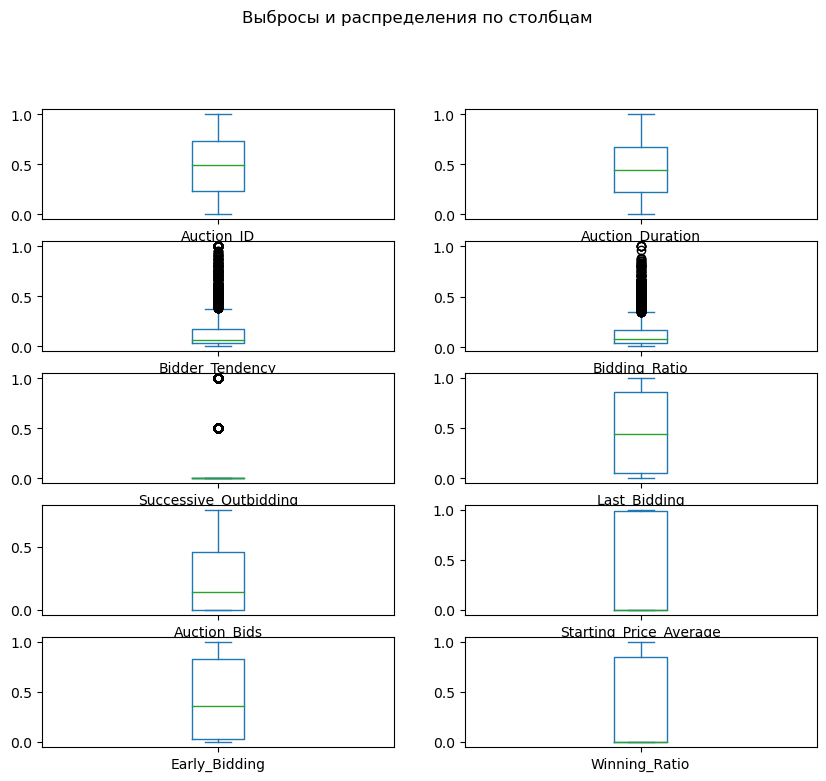

In [15]:
# посмотрим на распределения и выбросы оставшихся данных
df.drop('Class', axis=1).plot(kind='box', subplots=True, layout=(6,2), sharex=False, sharey=False, figsize=(10,10), title='Выбросы и распределения по столбцам')
plt.show()

In [16]:
#conda install -c conda-forge seaborn

AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)


Text(0, 0.5, 'Плотность вероятности')

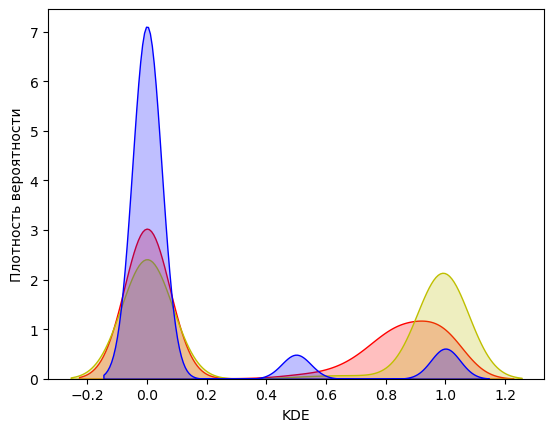

In [17]:
print(sns.kdeplot(data=df, x='Winning_Ratio', color='r', shade=True))
print(sns.kdeplot(data=df, x='Starting_Price_Average', color='y', shade=True))
print(sns.kdeplot(data=df, x='Successive_Outbidding', color='b', shade=True))
plt.xlabel('KDE')
plt.ylabel('Плотность вероятности')
# где: KDE (Kernel Density Estimation) - это метод оценки плотности вероятности на основе набора данных.
#Он позволяет построить сглаженную оценку плотности вероятности для непрерывных переменных.

Видим несколько проблемм.
- классы не сбалансированы.
- признаки содержат выбросы.
- скорее всего не все признаки в равной степени важны для модели.

Если классы в задаче look-alike сильно несбалансированы, то это может создать проблему при обучении модели, так как она может быть смещена к предсказанию доминирующего класса.

Все эти задачи решаемы, но в масштабе данного д.з  применим простой метод - Random negative sampling (случайная отрицательная выборка). Конечно при этом будет потеря данных и получим более грубую модель.

In [18]:
from sklearn.utils import resample
# разделяем набор данных на положительные примеры (positives) и неразмеченные примеры (unlabeled).
positives = df[df['Class'] == 1]
unlabeled = df[df['Class'] == 0]

In [19]:
# применяем метод resample из scikit-learn для случайной выборки отрицательных примеров (negative_samples)
# в количестве, соответствующем количеству положительных примеров.
n_samples = len(positives)
negative_samples = resample(unlabeled, replace=False, n_samples=n_samples, random_state=42)

In [20]:
# объединяем положительные и отрицательные примеры в новом сбалансированном наборе данных (balanced_data).
balanced_df = pd.concat([positives, negative_samples])

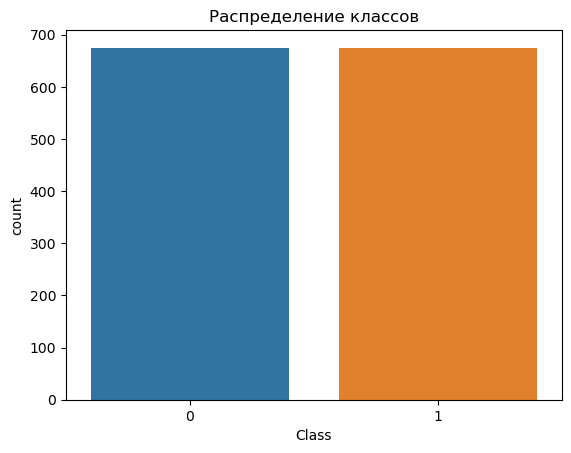

In [21]:
sns.countplot(data=balanced_df, x='Class')
plt.title("Распределение классов")
plt.show()

AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)


Text(0, 0.5, 'Плотность вероятности')

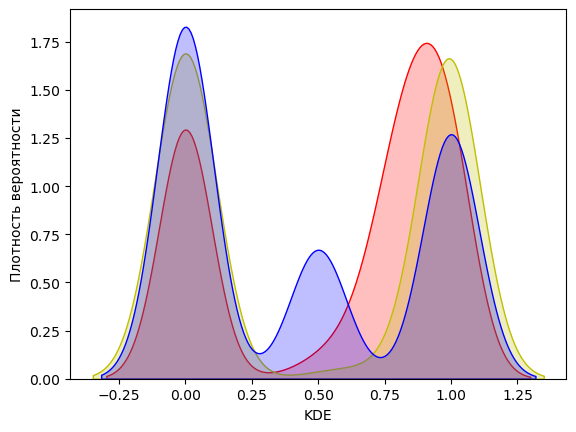

In [22]:
print(sns.kdeplot(data=balanced_df, x='Winning_Ratio', color='r', shade=True))
print(sns.kdeplot(data=balanced_df, x='Starting_Price_Average', color='y', shade=True))
print(sns.kdeplot(data=balanced_df, x='Successive_Outbidding', color='b', shade=True))
plt.xlabel('KDE')
plt.ylabel('Плотность вероятности')

### 3. обучить любой классификатор (какой вам нравится)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [24]:
# Выделение признаков и целевой переменной
X = balanced_df.drop('Class', axis=1)
y = balanced_df['Class']

In [25]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [26]:
# Создание и обучение модели Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score

# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
roc = roc_auc_score(Y_test, y_pred)

# Вывод результатов
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Roc_auc_score:", roc)

Accuracy: 0.9777777777777777
Precision: 0.958041958041958
Recall: 1.0
F1-score: 0.9785714285714286
Roc_auc_score: 0.9774436090225564


### 4. далее разделить ваш набор данных на два множества: P (positives) и U (unlabeled). Причем брать нужно не все положительные (класс 1) примеры, а только лишь часть

In [30]:
# Разделение на положительные и неразмеченные примеры
positives = df[df['Class'] == 1].sample(frac=0.5, random_state=17)  # Выбираем только 50% положительных примеров
unlabeled = df[df['Class'] == 0]

# Вывод информации о размере полученных множеств
print("Размер множества P (positives):", len(positives))
print("Размер множества U (unlabeled):", len(unlabeled))


Размер множества P (positives): 338
Размер множества U (unlabeled): 5646


### 5. применить random negative sampling для построения классификатора в новых условиях


**Как ответственный датасаентист я по собственной инициативе выполнил балансировку классов в feature engineering ))**

**Поэтому сейчас выполню обучение модели без балансировки классов**

In [31]:
# Выделение признаков и целевой переменной
x_data = df.copy()
y_data = x_data.pop('Class')

# Разделение на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=17)

# Создание и обучение модели Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)

# Прогнозирование на тестовых данных
y_pred = model.predict(x_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

# Вывод результатов
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Roc_auc_score:", roc)

Accuracy: 0.9699604743083003
Precision: 0.8741258741258742
Recall: 0.8620689655172413
F1-score: 0.8680555555555555
Roc_auc_score: 0.9229987684729065


### 6. сравнить качество с решением из пункта 4 (построить отчет - таблицу метрик)

Для сравнения качества модели, построенной с использованием random negative sampling, с моделью, полученной в пункте 4, мы можем построить отчет с различными метриками классификации. Вот пример кода для создания такого отчета:
В этом коде мы используем функцию classification_report из scikit-learn для создания отчета с различными метриками классификации, такими как точность, полнота, F1-мера и т. д.

Мы сравниваем отчеты для модели, построенной с использованием random negative sampling (report_sampling), и исходной модели, которую мы получили в пункте 4 (report_original).

Выводим оба отчета на экран для сравнения качества моделей.

In [32]:
from sklearn.metrics import classification_report

# Прогнозирование на тестовых данных с использованием random negative sampling
y_pred_sampling = model.predict(X_test)

# Отчет с метриками классификации для random negative sampling
report_sampling = classification_report(Y_test, y_pred_sampling)

# Отчет с метриками классификации для исходной модели
report_original = classification_report(y_test, y_pred)

# Вывод отчетов
print("Отчет с метриками классификации (random negative sampling):\n", report_sampling)
print("\nОтчет с метриками классификации (исходная модель):\n", report_original)


Отчет с метриками классификации (random negative sampling):
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       133
           1       0.97      0.91      0.94       137

    accuracy                           0.94       270
   macro avg       0.94      0.94      0.94       270
weighted avg       0.94      0.94      0.94       270


Отчет с метриками классификации (исходная модель):
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1120
           1       0.87      0.86      0.87       145

    accuracy                           0.97      1265
   macro avg       0.93      0.92      0.93      1265
weighted avg       0.97      0.97      0.97      1265



### 7. поэкспериментировать с долей P на шаге 5 (как будет меняться качество модели при уменьшении/увеличении размера P)

In [33]:
# Разделение на положительные и неразмеченные примеры
positives = balanced_df[balanced_df['Class'] == 1]
unlabeled = balanced_df[balanced_df['Class'] == 0]

# Список долей P для эксперимента
p_ratios = [0.2, 0.4, 0.6, 0.8]

# Итерация по различным долям P
for p_ratio in p_ratios:
    # Выбор подмножества положительных примеров
    n_samples = int(len(positives) * p_ratio)
    sampled_positives = resample(positives, replace=False, n_samples=n_samples, random_state=17)

    # Объединение положительных и неразмеченных примеров
    balanced_data = pd.concat([sampled_positives, unlabeled])

    # Выделение признаков и целевой переменной
    X1 = balanced_data.drop('Class', axis=1)
    Y1 = balanced_data['Class']

    # Разделение на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=17)

    # Создание и обучение модели Logistic Regression
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Прогнозирование на тестовых данных
    y_pred = model.predict(X_test)

    # Оценка точности модели
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    print("Доля P:", p_ratio)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Roc_auc_score:", roc)
    print("------------------------")

Доля P: 0.2
Accuracy: 0.9938271604938271
Precision: 0.9473684210526315
Recall: 1.0
F1-score: 0.972972972972973
Roc_auc_score: 0.9965277777777778
------------------------
Доля P: 0.4
Accuracy: 0.9947089947089947
Precision: 0.9803921568627451
Recall: 1.0
F1-score: 0.99009900990099
Roc_auc_score: 0.9964028776978417
------------------------
Доля P: 0.6
Accuracy: 0.9814814814814815
Precision: 0.948051948051948
Recall: 1.0
F1-score: 0.9733333333333333
Roc_auc_score: 0.9860139860139859
------------------------
Доля P: 0.8
Accuracy: 0.9835390946502057
Precision: 0.9658119658119658
Recall: 1.0
F1-score: 0.9826086956521739
Roc_auc_score: 0.9846153846153847
------------------------
